In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import VGG16



In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename=os.path.join(os.getcwd(), "cats_and_dogs_filtered.zip")
tf.keras.utils.get_file(filename, url)
with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall()



68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

train_dir = os.path.join('cats_and_dogs_filtered', 'train')
validation_dir = os.path.join('cats_and_dogs_filtered', 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)



In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') ## For Classification use Binary Cross Entropy

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
conv_base=VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
## Build the model on top of Conolutional base
model=tf.keras.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten()) ## Used for convering the matrix into one- row matrix
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) ## Using Dropout to prevent Overfitting the model
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) ## Use Softmax for Classifcation if required

In [ ]:
## Compile the Model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])


In [ ]:
with tf.device('/GPU:0'):
  history=model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      )

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 194ms/step - accuracy: 0.5672 - loss: 0.6965 - val_accuracy: 0.7820 - val_loss: 0.4995
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.6900 - loss: 0.5756 - val_accuracy: 0.8300 - val_loss: 0.4171
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.7432 - loss: 0.5103 - val_accuracy: 0.8430 - val_loss: 0.3762
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.7702 - loss: 0.4791 - val_accuracy: 0.8360 - val_loss: 0.3612
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.7560 - loss: 0.4769 - val_accuracy: 0.8540 - val_loss: 0.3393
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.8201 - loss: 0.4149 - val_accuracy: 0.8620 - val_loss: 0.3262
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.8040 - loss: 0.4182 - val_accuracy: 0.8570 - val_loss: 0.3256
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - accuracy: 0.8089 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


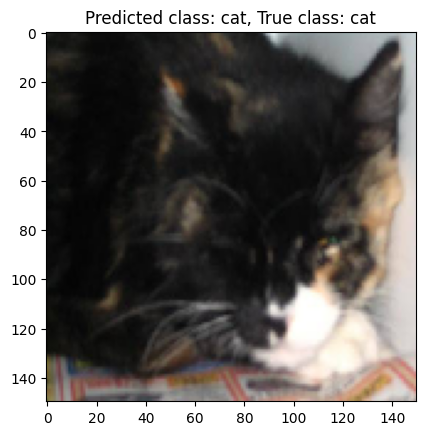

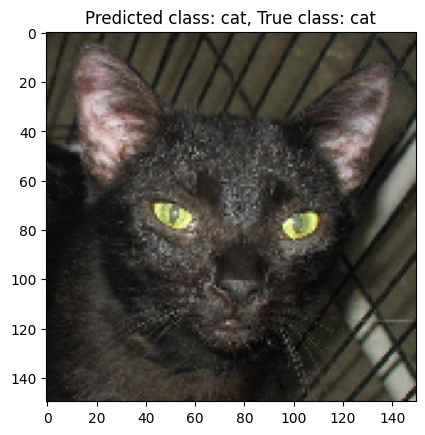

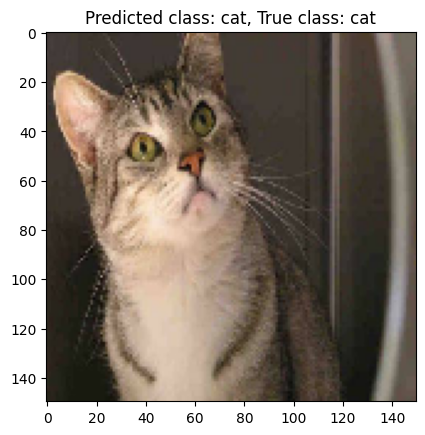

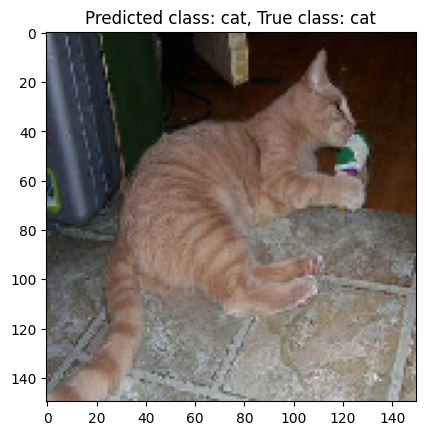

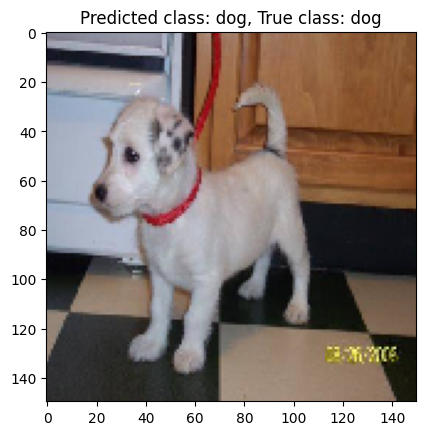

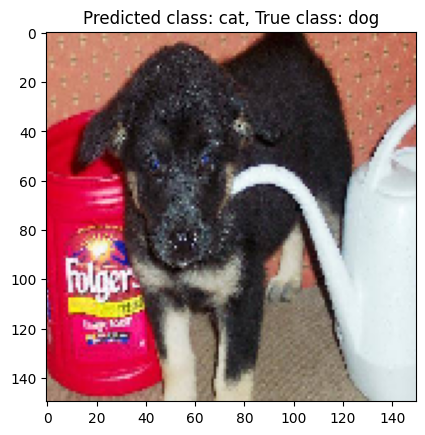

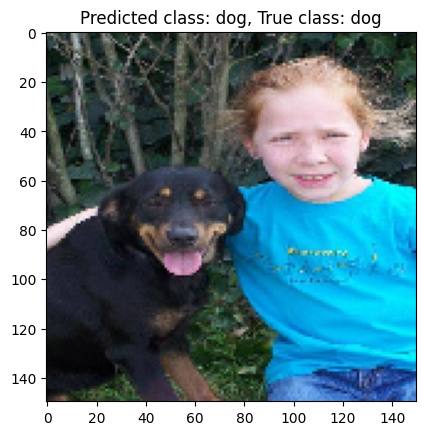

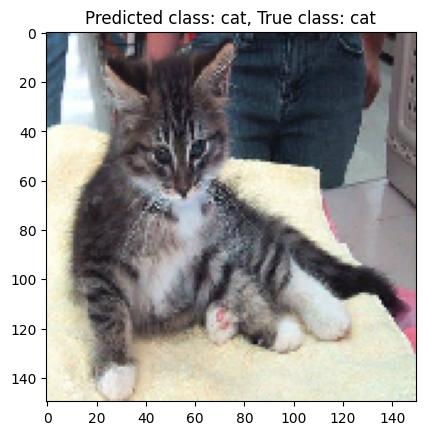

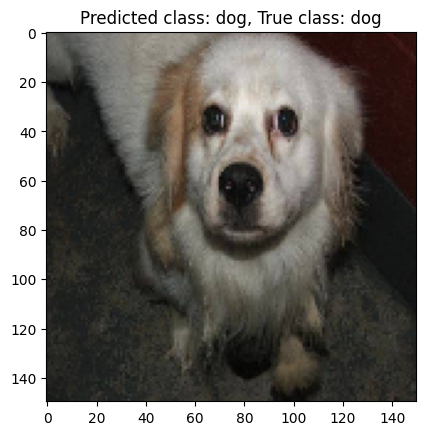

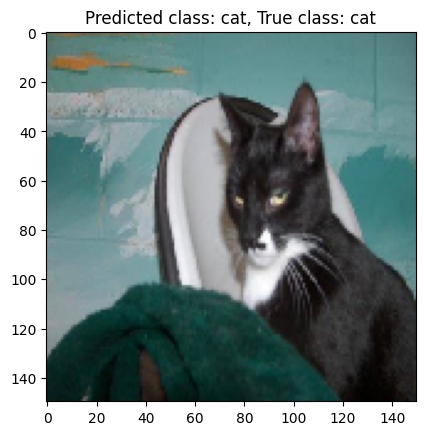

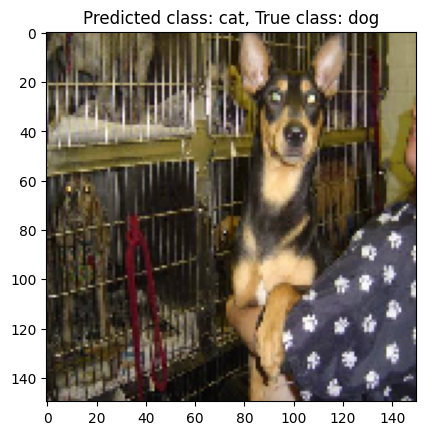

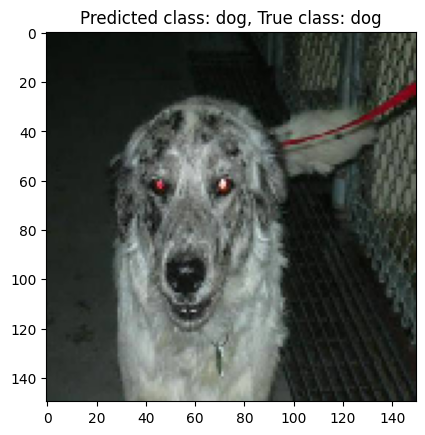

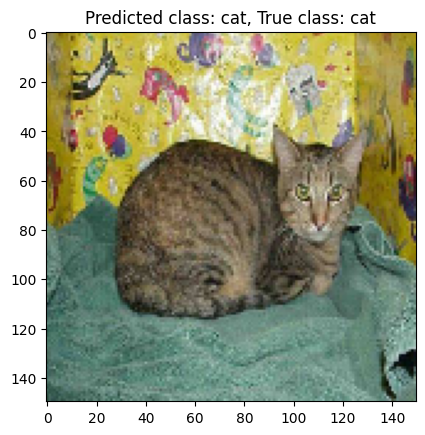

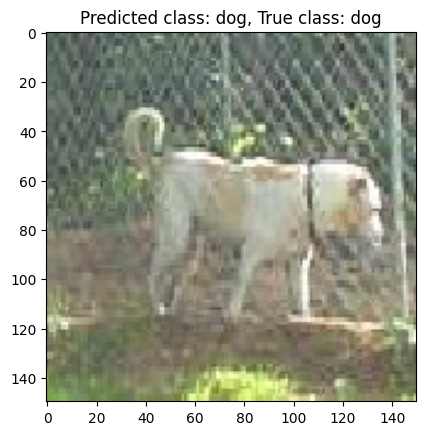

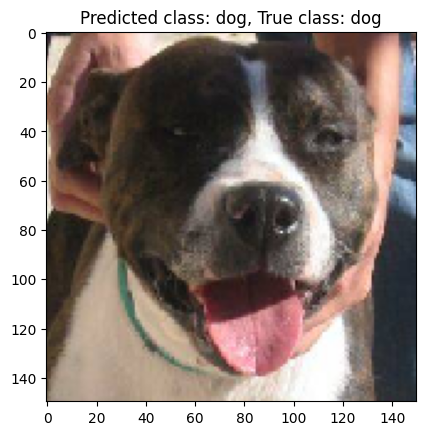

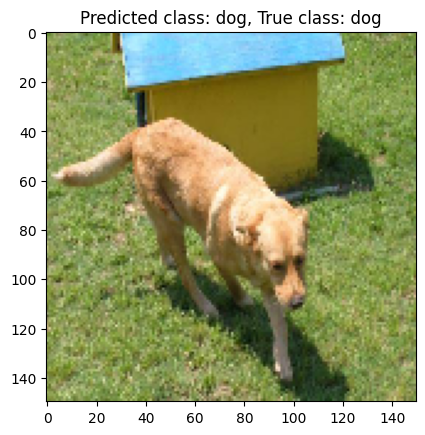

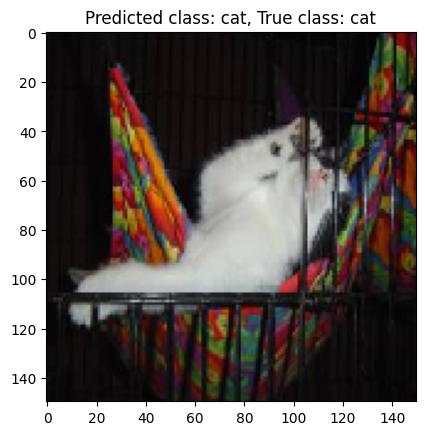

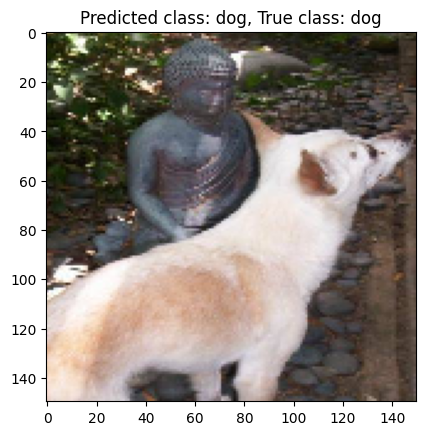

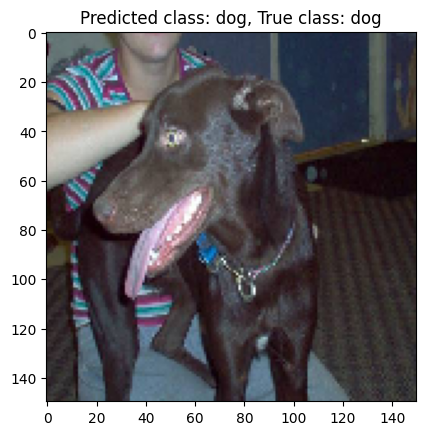

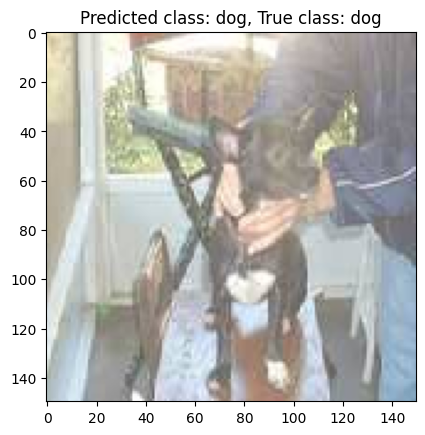

In [ ]:
x,y_true=next(validation_generator)
y_pred=model.predict(x)
class_names=['cat','dog']
for i in range(len(x)):
    plt.imshow(x[i])
    plt.title(f"Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(round(y_true[i]))]}")
    plt.show()